# DOJO CargoX - Data Science

## O que deverá ser feito? 

Esse desafio consiste em um _dataset_ que nós gostariamos que você estudasse e propusesse um modelo preditivo.

### Objetivos

* Analisar os dados, apresentar o que foi encontrado e decisões tomadas e,
* Construir um modelo preditivo em cima dos dados do desafio

Vale ressaltar que **não existe resposta certa** para o desafio, e que o
trabalho e o processo para realizar esses dois objetivos são tão importantes
quanto o resultado final.

---

# A Seguradora Thomas Andrews

Você trabalha para a Seguradora Thomas Andrews, responsável por segurar os
passageiros dos [três Transatlânticos da Classe
_Olympic_](https://en.wikipedia.org/wiki/Olympic-class_ocean_liner) da companhia
inglesa [White Star Line](https://en.wikipedia.org/wiki/White_Star_Line).

Infelizmente, a segunda embarcação da White Star Line, o [RMS
Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) afundou em sua viagem
inaugural. Muitos passageiros faleceram pela falta de botes salva-vidas
suficientes na embarcação, levando a um enorme prejuízo para a Thomas Andrews.

## Seria possível evitar tragédias? 

Para evitar futuras tragédias -financeiras para a empresa, no caso- a Diretoria
da Thomas Andrews está pedindo um modelo para tentar prever quais passageiros
podem vir a falecer nas próximas viagens, para cobrar um _premium_ sobre seu
seguro, ou até impedir eles de embarcar!

Para isso, a seguradora está disponibilizando dois arquivos com dados do
Titanic para seu trabalho:

* passageiros que a companhia sabe se sobreviveram ou não (`train.csv`),
* passageiros que a companhia tem dados, mas desconhece o destino (`test.csv`)

Existe mais um arquivo em anexo, o `variables.txt` que descreve os campos que
você encontra nas duas listagens de passageiros.

A partir dessas informações, a Diretoria espera que você entenda o dados
coletados e modele algo que possa ajudar a companhia previnir futuras perdas!

## Próxima reunião da Diretoria

É esperado que você apresente seus resultados na próxima reunião da Diretoria da
Thomas Andrews. A apresentação não é formal, mas você precisa mostrar seu
progresso e suas decisões ao longo do caminho.

Boa sorte e até a próxima reunião!

---
## Variáveis
survived:
  * se o passageiro sobreviveu ou não
  * valores possíveis:
    0 = Não
    1 = Sim

pclass:
  * classe da Passagem no navio
  * valores possíveis:
    1 = primeira classe,
    2 = classe executiva,
    3 = classe economica

sex:
  * o genero do passageiro

Age:
  * idade em anos

sibsp
  * numero de irmaos/companheiros dentro do navio

parch:
  * numero de parentes e filhos no navio

ticket:
  * codigo da passagem

fare:
  * valor da passagem

cabin:
  * número da cabine

embarked:
  * local onde embarcou no Titanic
  * possiveis valores: 
    C = Cherbourg,
    Q = Queenstown,
    S = Southampton



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import path

In [2]:
df_train = pd.read_csv("train.csv")
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",woman,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df_train["age"].unique()

array([  22.  ,   38.  ,   26.  ,   35.  ,     nan,   54.  ,    2.  ,
         27.  ,   14.  ,    4.  ,   58.  ,   20.  ,   39.  ,   55.  ,
         31.  ,   34.  ,   15.  ,   28.  ,    8.  ,   19.  ,   40.  ,
        117.  ,   42.  ,   21.  ,   18.  ,    3.  ,    7.  ,   49.  ,
         29.  ,   65.  ,   28.5 ,    5.  ,   11.  ,   45.  ,   17.  ,
         32.  ,   16.  ,   25.  ,    0.83,   30.  ,   33.  ,   23.  ,
         24.  ,   46.  ,   59.  ,   71.  ,   37.  ,   47.  ,   14.5 ,
         70.5 ,   32.5 ,   12.  ,    9.  ,   36.5 ,   51.  ,  194.  ,
         40.5 ,   44.  ,    1.  ,   61.  ,   56.  ,   50.  ,   36.  ,
         45.5 ,   20.5 ,   62.  ,   41.  ,   52.  ,   63.  ,   23.5 ,
          0.92,   43.  ,   60.  ,   10.  ,   64.  ,   13.  ,   48.  ,
          0.75,   53.  ,   57.  ,   80.  ,   70.  ,   24.5 ,    6.  ,
          0.67,   30.5 ,    0.42,   34.5 ,   74.  ])

In [5]:
df_train["age"].describe()

count    748.000000
mean      29.777634
std       15.842432
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max      194.000000
Name: age, dtype: float64

In [6]:
df_train["sex"].unique()

array(['male', 'Female ', 'women', 'female_', 'male ', 'woman', ' male',
       'man', 'female', 'mal', nan, 'Male', ' female  '], dtype=object)

In [7]:
sex_dict = {
    'male': 'male',
    'male ': 'male',
    ' male': 'male',
    'man': 'male',
    'mal': 'male',
    'Male': 'male',
    'Female ': 'female',
    'female_': 'female',
    'women': 'female',
    'woman': 'female',
    'female  ': 'female'
}

In [8]:
df_train["sex"] = df_train["sex"].map(sex_dict)

In [9]:
df_train["sex"].isna().sum()

172

In [10]:
df_train[df_train["sex"].isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
15,16,1,2.0,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",NaN,31.0,1,0,345763,18.0000,NaN,S
25,26,1,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,38.0,1,5,347077,31.3875,NaN,S
33,34,0,2.0,"Wheadon, Mr. Edward H",NaN,117.0,0,0,C.A. 24579,10.5000,NaN,S
40,41,0,3.0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",NaN,40.0,1,0,7546,9.4750,NaN,S
43,44,1,2.0,"Laroche, Miss. Simonne Marie Anne Andree",NaN,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
44,45,1,3.0,"Devaney, Miss. Margaret Delia",NaN,19.0,0,0,330958,7.8792,NaN,Q
49,50,0,3.0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,18.0,1,0,349237,17.8000,NaN,S
52,53,1,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",NaN,49.0,1,0,PC 17572,76.7292,D33,C
53,54,1,2.0,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",NaN,29.0,1,0,2926,26.0000,NaN,S


In [11]:
df_train[df_train["sex"].isna()]["name"].str.split(", ").iloc[1]

['Vander Planke', 'Mrs. Julius (Emelia Maria Vandemoortele)']

In [12]:
df_train[df_train["sex"].isna()]["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

15        Mrs
18        Mrs
25        Mrs
33         Mr
40        Mrs
43       Miss
44       Miss
49        Mrs
52        Mrs
53        Mrs
58       Miss
61       Miss
66        Mrs
67         Mr
71       Miss
81         Mr
85        Mrs
98        Mrs
100      Miss
113      Miss
128      Miss
132       Mrs
136      Miss
140       Mrs
147      Miss
151       Mrs
156      Miss
166       Mrs
177      Miss
180      Miss
        ...  
792      Miss
800        Mr
809       Mrs
816      Miss
827    Master
829       Mrs
841        Mr
847        Mr
849       Mrs
853      Miss
856       Mrs
857        Mr
858       Mrs
865       Mrs
868        Mr
871       Mrs
874       Mrs
875      Miss
880       Mrs
884        Mr
885       Mrs
887      Miss
889        Mr
891    Master
897      Miss
899      Miss
900      Miss
903      Miss
906      Miss
920      Miss
Name: name, Length: 172, dtype: object

In [13]:
df_train["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
906      Miss
907        Mr
908      Miss
909       Rev
910        Mr
911        Mr
912        Mr
913      Miss
914        Mr
915        Mr
916    Master
917       Don
918        Mr
919    Master
920      Miss
921        Mr
922      Miss
923        Mr
924      Miss
925        Mr
926        Mr
927        Mr
928      Miss
929      Miss
930        Mr
931        Mr
932        Mr
933        Mr
934        Mr
935       Mrs
Name: name, Length: 936, dtype: object

In [14]:
df_train["title"]=df_train["name"].apply(lambda x : x.split(", ")[1].split(".")[0])

In [15]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [16]:
df_train["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
df_train["title"].value_counts()

Mr              541
Miss            197
Mrs             126
Master           43
Rev               7
Dr                7
Don               2
Mlle              2
Major             2
Col               2
Ms                1
the Countess      1
Capt              1
Jonkheer          1
Mme               1
Lady              1
Sir               1
Name: title, dtype: int64

In [18]:
df_train[df_train["sex"].isna()]["title"].value_counts()

Miss            77
Mrs             60
Mr              26
Master           4
Mlle             2
Mme              1
the Countess     1
Major            1
Name: title, dtype: int64

In [19]:
title_dict = {
    'Miss': 'female',
    'Mrs': 'female',
    'Mr': 'male',
    'Master':'male',
    'Mlle':'female',
    'Mme':'female',
    'Major':'male',
    'the Countess':'female'
}

In [20]:
df_train[df_train["sex"].isna()] = df_train["title"].map(title_dict)

ValueError: Must have equal len keys and value when setting with an iterable

In [21]:
mask = df_train["sex"].isna()

In [22]:
df_train[mask] 

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
15,16,1,2.0,"Hewlett, Mrs. (Mary D Kingcome)",NaN,55.0,0,0,248706,16.0000,NaN,S,Mrs
18,19,0,3.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",NaN,31.0,1,0,345763,18.0000,NaN,S,Mrs
25,26,1,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",NaN,38.0,1,5,347077,31.3875,NaN,S,Mrs
33,34,0,2.0,"Wheadon, Mr. Edward H",NaN,117.0,0,0,C.A. 24579,10.5000,NaN,S,Mr
40,41,0,3.0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",NaN,40.0,1,0,7546,9.4750,NaN,S,Mrs
43,44,1,2.0,"Laroche, Miss. Simonne Marie Anne Andree",NaN,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Miss
44,45,1,3.0,"Devaney, Miss. Margaret Delia",NaN,19.0,0,0,330958,7.8792,NaN,Q,Miss
49,50,0,3.0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",NaN,18.0,1,0,349237,17.8000,NaN,S,Mrs
52,53,1,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",NaN,49.0,1,0,PC 17572,76.7292,D33,C,Mrs
53,54,1,2.0,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",NaN,29.0,1,0,2926,26.0000,NaN,S,Mrs


In [23]:
df_train[mask]["title"].map(title_dict)

15     female
18     female
25     female
33       male
40     female
43     female
44     female
49     female
52     female
53     female
58     female
61     female
66     female
67       male
71     female
81       male
85     female
98     female
100    female
113    female
128    female
132    female
136    female
140    female
147    female
151    female
156    female
166    female
177    female
180    female
        ...  
792    female
800      male
809    female
816    female
827      male
829    female
841      male
847      male
849    female
853    female
856    female
857      male
858    female
865    female
868      male
871    female
874    female
875    female
880    female
884      male
885    female
887    female
889      male
891      male
897    female
899    female
900    female
903    female
906    female
920    female
Name: title, Length: 172, dtype: object

In [24]:
df_train[mask]["sex"] = df_train[mask]["title"].map(title_dict)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_train["sex"].isna().sum()

172

In [26]:
df_train.loc[mask,"sex"] = df_train[mask]["title"].map(title_dict)

In [27]:
df_train["sex"].isna().sum()

0

In [28]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
df_train.groupby(["sex","survived"])["passengerid"].count()

sex     survived
female  0            85
        1           245
male    0           491
        1           115
Name: passengerid, dtype: int64

In [30]:
df_train["age"].isna().sum()

188

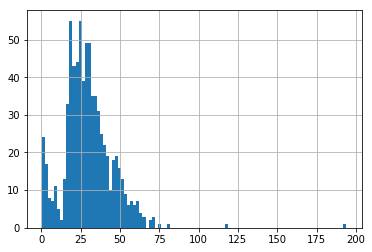

In [31]:
df_train["age"].hist(bins=100)

In [32]:
df_train["age"].median()

28.0

In [33]:
df_train = df_train[df_train["age"]<100]
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


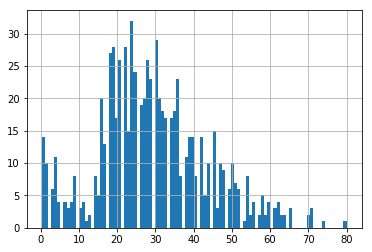

In [34]:
df_train["age"].hist(bins=100)

In [35]:
df_train["age"].median()

28.0

In [36]:
df_aux = df_train["age"].apply(lambda x: df_train["age"].median() if np.isnan(x) else x)

In [37]:
df_train["age"] = df_aux

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
10,11,1,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss


In [39]:
df_train["age"].isna().sum()

0

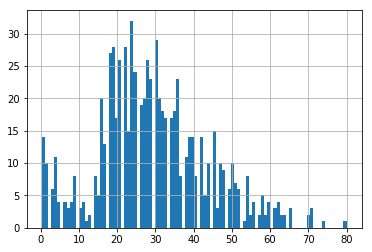

In [40]:
df_train["age"].hist(bins=100)

In [41]:
df_train.groupby(["age","survived"])["passengerid"].count()

age    survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   0           2
       1           5
2.00   0           7
       1           3
3.00   0           1
       1           5
4.00   0           4
       1           7
5.00   1           4
6.00   0           1
       1           3
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           3
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           4
14.50  0           1
                  ..
50.00  0           5
       1           5
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
56.00  0           2
       1           2
57.00  0           2
58.00  0           2
       1          

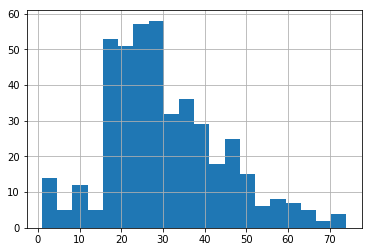

In [42]:
df_train[df_train["survived"]==0]["age"].hist(bins=20)

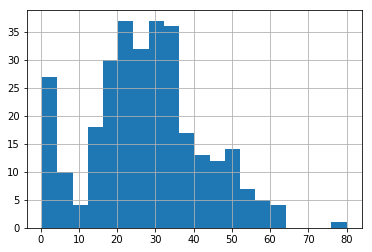

In [43]:
df_train[df_train["survived"]==1]["age"].hist(bins=20)

In [45]:
df_train.groupby(["pclass", "survived"])["passengerid"].count()

pclass  survived
1.0     0            65
        1           128
2.0     0            91
        1            84
3.0     0           279
        1            90
Name: passengerid, dtype: int64

In [46]:
df_train["pclass"].isna().sum()

9

In [48]:
mask = df_train["pclass"].isna()
df_train[mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
35,36,0,NaN,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Mr
161,162,1,NaN,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,Mrs
332,333,0,NaN,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,Mr
471,472,0,NaN,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,Mr
476,477,0,NaN,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,Mr
619,620,0,NaN,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S,Mr
703,704,0,NaN,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,Mr
813,814,0,NaN,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Miss
871,872,1,NaN,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs


In [52]:
df_train.groupby(["pclass"])["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1.0,193.0,85.625885,79.876970,0.0,32.3208,63.3583,93.50,512.3292
2.0,175.0,21.787595,13.729023,10.5,13.0000,15.0000,26.00,73.5000
3.0,369.0,13.141440,9.905385,0.0,7.7750,8.0500,15.55,56.4958


In [55]:
df_train.groupby(["pclass","age"])["fare"].describe()

count        mean         std       min         25%        50%  \
pclass age                                                                     
1.0    0.92     1.0  151.550000         NaN  151.5500  151.550000  151.55000   
       2.00     1.0  151.550000         NaN  151.5500  151.550000  151.55000   
       4.00     1.0   81.858300         NaN   81.8583   81.858300   81.85830   
       11.00    1.0  120.000000         NaN  120.0000  120.000000  120.00000   
       14.00    1.0  120.000000         NaN  120.0000  120.000000  120.00000   
       15.00    1.0  211.337500         NaN  211.3375  211.337500  211.33750   
       16.00    4.0   55.819800   22.249774   39.4000   39.400000   48.68960   
       17.00    3.0   92.261100   30.553105   57.0000   82.950000  108.90000   
       18.00    4.0  169.612500   88.953168   79.6500  101.587500  168.21250   
       19.00    6.0   81.624300   92.293549   26.2833   27.212475   41.55000   
       21.00    3.0  139.206933  106.667202   77.2875   77.622900   77.95830   
       22.00    5.0   91.656660   48.140129   49.5000   55.000000   66.60000   
       23.00    3.0  146.544433  103.895830   63.3583   88.316650  113.27500   
       24.00    7.0  122.997614   91.086262   49.5042   69.300000   79.20000   
       25.00    3.0   99.356967   48.585928   55.4417   73.260450   91.07920   
       26.00    3.0   62.566667   28.203561   30.0000   54.425000   78.85000   
       27.00    4.0   92.957300   81.251137   30.5000   47.450000   64.91460   
       28.00    5.0   45.364160   21.830700   26.5500   35.500000   35.50000   
       29.00    3.0  102.645833   95.892121   30.0000   48.300000   66.60000   
       30.00    7.0   61.872029   33.383483   27.7500   31.000000   56.92920   
       31.00    5.0   87.527500   50.521688   50.4958   52.000000   57.00000   
       32.00    2.0   53.395850   32.379622   30.5000   41.947925   53.39585   
       33.00    4.0   58.650000   39.444349    5.0000   41.075000   69.80000   
       34.00    2.0   26.550000    0.000000   26.5500   26.550000   26.55000   
       35.00    9.0  165.744911  199.406636   26.2875   52.000000   83.47500   
       36.00    9.0  125.623611  150.790271   26.2875   40.125000   78.85000   
       37.00    4.0   47.113550   11.611884   29.7000   46.840650   52.82710   
       38.00    5.0   93.761660   82.753686    0.0000   71.283300   80.00000   
       39.00    5.0   65.918320   41.692976    0.0000   55.900000   79.65000   
       40.00    6.0   62.400683   64.460535    0.0000   27.720800   29.36040   
...             ...         ...         ...       ...         ...        ...   
3.0    30.50    2.0    7.900000    0.212132    7.7500    7.825000    7.90000   
       31.00    8.0   10.795837    5.277582    7.7500    7.834400    7.88960   
       32.00   12.0   17.335758   18.527440    7.7500    7.917700    7.98750   
       33.00    8.0   10.844787    4.735049    7.7750    7.895800    8.65835   
       34.00    4.0    9.248950    3.511320    6.4958    7.661450    8.05000   
       34.50    1.0    6.437500         NaN    6.4375    6.437500    6.43750   
       35.00    6.0    9.736800    5.170061    7.0500    7.317700    7.97290   
       36.00    6.0   12.081933    8.607868    0.0000    7.595800   11.72290   
       37.00    2.0    8.756250    1.175565    7.9250    8.340625    8.75625   
       38.00    3.0   15.444433   13.813576    7.0500    7.472900    7.89580   
       39.00    6.0   21.945833   11.168107    7.9250   11.981250   26.63750   
       40.00    5.0   13.599160    8.635597    7.2250    7.895800    9.47500   
       40.50    2.0   11.125000    4.772971    7.7500    9.437500   11.12500   
       41.00    4.0   20.283325   13.997613    7.1250   12.362475   17.16040   
       42.00    4.0    8.066675    0.550606    7.5500    7.625000    8.02710   
       43.00    3.0   20.466667   22.905913    6.4500    7.250000    8.05000   
       44.00    5.0    9.635000    3.614450    7.9250    8.050000    8.05000   
       45.00  

In [57]:
df_train.groupby(["age"])["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.42,1.0,8.516700,NaN,8.5167,8.516700,8.51670,8.516700,8.5167
0.67,1.0,14.500000,NaN,14.5000,14.500000,14.50000,14.500000,14.5000
0.75,2.0,19.258300,0.000000,19.2583,19.258300,19.25830,19.258300,19.2583
0.83,2.0,23.875000,7.247845,18.7500,21.312500,23.87500,26.437500,29.0000
0.92,1.0,151.550000,NaN,151.5500,151.550000,151.55000,151.550000,151.5500
1.00,7.0,30.005957,13.890034,11.1333,18.158350,37.00420,39.343750,46.9000
2.00,10.0,37.536250,40.979945,10.4625,22.306250,26.95000,30.737500,151.5500
3.00,6.0,25.781950,9.489778,15.9000,19.331250,23.53750,30.040625,41.5792
4.00,11.0,29.393936,19.229932,11.1333,19.362500,27.90000,30.200000,81.8583


In [63]:
df_train[df_train["passengerid"]==36]["pclass"]=1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
mask=df_train["passengerid"]==36
df_train.loc[mask,"pclass"]=1


In [67]:
mask = df_train["pclass"].isna()
df_train[mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
161,162,1,NaN,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,Mrs
332,333,0,NaN,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,Mr
471,472,0,NaN,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,Mr
476,477,0,NaN,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,Mr
619,620,0,NaN,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S,Mr
703,704,0,NaN,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,Mr
813,814,0,NaN,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Miss
871,872,1,NaN,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs


In [69]:
mask=df_train.passengerid.isin([333, 872, 814])
df_train.loc[mask,"pclass"]=1


In [70]:
mask=df_train.passengerid.isin([162, 477])
df_train.loc[mask,"pclass"]=2

In [71]:
mask=df_train.passengerid.isin([472, 620, 704])
df_train.loc[mask,"pclass"]=3

In [72]:
mask = df_train["pclass"].isna()
df_train[mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title


In [73]:
df_train.groupby(["pclass", "survived"])["passengerid"].count()

pclass  survived
1.0     0            68
        1           129
2.0     0            92
        1            85
3.0     0           282
        1            90
Name: passengerid, dtype: int64

In [74]:
df_train.head

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [76]:
mask = df_train["embarked"].isna()
df_train[mask]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
61,62,1,1.0,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [77]:
df_train["embarked"].value_counts()

S    579
C    136
Q     29
Name: embarked, dtype: int64

In [79]:
df_train["ticket"].str.startswith('113').head()

0    False
1    False
2    False
3     True
4    False
Name: ticket, dtype: bool

In [83]:
mask=df_train["ticket"].str.startswith('113')
df_train[mask]["embarked"].value_counts()

S    37
C     5
Name: embarked, dtype: int64

In [84]:
df_train = df_train[~df_train["embarked"].isna()]

In [86]:
df_train["embarked"].isna().sum()

0

In [87]:
df_train.groupby(["embarked", "survived"])["passengerid"].count()

embarked  survived
C         0            55
          1            81
Q         0            20
          1             9
S         0           367
          1           212
Name: passengerid, dtype: int64

In [89]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [95]:
df_train.groupby(["sibsp", "survived"])["passengerid"].count()

sibsp  survived
0      0           307
       1           184
1      0            89
       1           100
2      0            16
       1            11
3      0            10
       1             4
4      0            15
       1             3
5      0             5
Name: passengerid, dtype: int64

In [96]:
df_train["parch"].isna().sum()

0

In [98]:
df_train.groupby(["parch", "survived"])["passengerid"].count()

parch  survived
0      0           350
       1           195
1      0            50
       1            63
2      0            31
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: passengerid, dtype: int64

In [99]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


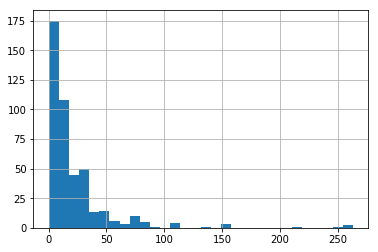

In [101]:
df_train[df_train["survived"]==0]["fare"].hist(bins=30)

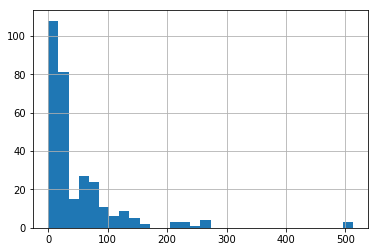

In [102]:
df_train[df_train["survived"]==1]["fare"].hist(bins=30)

In [103]:
df_train[df_train["fare"]>500]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
258,259,1,1.0,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1,1.0,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr


In [104]:
df_train["cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7',
       'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49', 'D',
       'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34',
       'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37', 'B35', 'E50',
       'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46',
       'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68',
       'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26',
       'D48', 'E58', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30',
       'E121', 'D11', 'E77', 'B3', 'D6

In [109]:
df_train["cabin"].isna().sum()

555

In [114]:
genderdict = {'male': 0, "female": 1}
df_train['gender01'] = df_train['sex'].map(genderdict)
df_train

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,gender01
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,1
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1
10,11,1,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,1


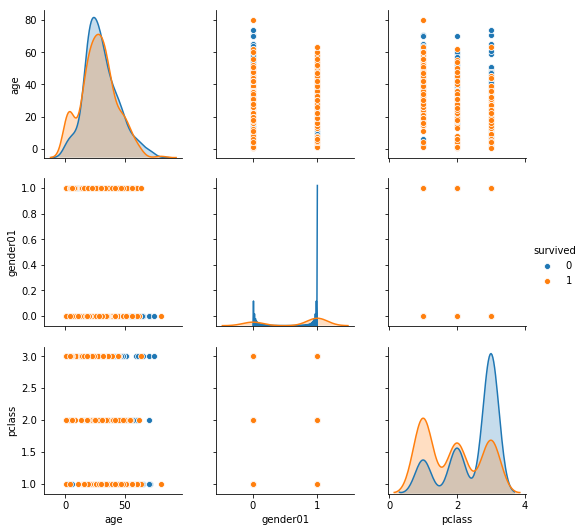

In [118]:
cols = ['age', 'gender01', 'pclass', 'survived']
sns.pairplot(df_train[cols], vars=cols[:-1], hue='survived')

In [121]:
embarkeddict= {'C': 0, "S": 1, "Q": 2}
df_train['embarked012'] = df_train['embarked'].map(embarkeddict)
df_train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,gender01,embarked012
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


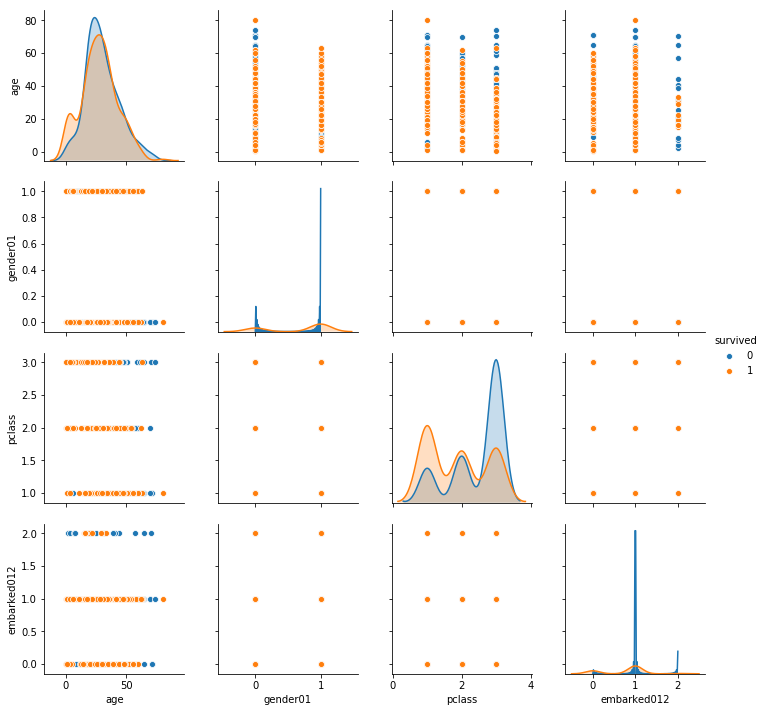

In [122]:
cols = ['age', 'gender01', 'pclass', 'embarked012', 'survived']
sns.pairplot(df_train[cols], vars=cols[:-1], hue='survived')